# 온라인 배송 데이터로 재구매의사 추론하기
고객의 서비스 재사용은 전자상거래 서비스의 수익에 큰 영향을 준다.
서비스의 수익을 높이기 위해서 고객의 재구매의사에 어떤 요소가 중요한지 알아낼 필요가 있다.

## 라이브러리 불러오기 & 설정
  - re
  - numpy
  - pandas
  - seaborn
  - matplotlib

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["font.family"] = 'NanumMyeongjo'
plt.rcParams['figure.figsize'] = (20, 10)

import warnings
warnings.filterwarnings('ignore')

## 배송 데이터 가져오기

In [2]:
data = pd.read_csv('./data/online_delivery.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [3]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

### 열이름 변경하기

In [4]:
data.rename(columns={
    'Age': '나이',
    'Gender': '성별',
    'Marital Status': '결혼',
    'Occupation': '직업',
    'Monthly Income': '월수입',
    'Educational Qualifications': '학력',
    'Family size': '가족수',
    'latitude': '위도',
    'longitude': '경도',
    'Pin code': '우편번호',
    'Medium (P1)': '주문수단1',
    'Medium (P2)': '주문수단2',
    'Meal(P1)': '상품주문순서1',
    'Meal(P2)': '상품주문순서2',
    'Perference(P1)': '선호상품1',
    'Perference(P2)': '선호상품2',
    'Ease and convenient': '평가-편리함',
    'Time saving': '평가-시간절약',
    'More restaurant choices': '유입영향력-주문수',
    'Easy Payment option': '유입영향력-결제수단',
    'More Offers and Discount': '유입영향력-가성비',
    'Good Food quality': '유입영향력-음식질',
    'Good Tracking system': '유입영향력-배송추적',
    'Influence of rating': '유입영향력-별점',
    'Self Cooking': '비구매요인-직접요리',
    'Health Concern': '비구매요인-건강식',
    'Late Delivery': '비구매요인-긴배달시간',
    'Poor Hygiene': '비구매요인-비위생',
    'Bad past experience': '비구매요인-해충',
    'Unavailability': '비구매요인-이용불가',
    'Unaffordable': '비구매요인-미제공',
    'Long delivery time': '취소사유-긴배달시간',
    'Delay of delivery person getting assigned': '취소사유-배달원배정지연',
    'Delay of delivery person picking up food': '취소사유-배달원픽업지연',
    'Wrong order delivered': '취소사유-배송오류',
    'Missing item': '취소사유-상품누락',
    'Order placed by mistake': '취소사유-주문오류',
    'Influence of time': '중요성-시간',
    'Less Delivery time': '중요도-빠른배송',
    'High Quality of package': '중요도-포장',
    'Number of calls': '중요도-배송원연락수',
    'Politeness': '중요도-배송원정직함',
    'Freshness ': '중요도-음식신선함',
    'Temperature': '중요도-음식온도',
    'Good Taste ': '중요도-음식맛',
    'Good Quantity': '중요도-음식양',
    'Order Time': '주문시간',
    'Maximum wait time': '주문대기가능시간',
    'Residence in busy location': '거주지사용',
    'Google Maps Accuracy': '구글맵정확도',
    'Good Road Condition': '거주지도로한적함',
    'Low quantity low time': '적은상품빠른배송',
    'Delivery person ability': '배송원실력',
    'Output': '재구매의사',
    'Reviews': '후기'
}, inplace=True)

### Null 데이터 제거

In [5]:
data.isnull().sum()

나이              0
성별              0
결혼              0
직업              0
월수입             0
학력              0
가족수             0
위도              0
경도              0
우편번호            0
주문수단1           0
주문수단2           0
상품주문순서1         0
상품주문순서2         0
선호상품1           0
선호상품2           0
평가-편리함          0
평가-시간절약         0
유입영향력-주문수       0
유입영향력-결제수단      0
유입영향력-가성비       0
유입영향력-음식질       0
유입영향력-배송추적      0
비구매요인-직접요리      0
비구매요인-건강식       0
비구매요인-긴배달시간     0
비구매요인-비위생       0
비구매요인-해충        0
비구매요인-이용불가      0
비구매요인-미제공       0
취소사유-긴배달시간      0
취소사유-배달원배정지연    0
취소사유-배달원픽업지연    0
취소사유-배송오류       0
취소사유-상품누락       0
취소사유-주문오류       0
중요성-시간          0
주문시간            0
주문대기가능시간        0
거주지사용           0
구글맵정확도          0
거주지도로한적함        0
적은상품빠른배송        0
배송원실력           0
유입영향력-별점        0
중요도-빠른배송        0
중요도-포장          0
중요도-배송원연락수      0
중요도-배송원정직함      0
중요도-음식신선함       0
중요도-음식온도        0
중요도-음식맛         0
중요도-음식양         0
재구매의사           0
후기              0
dtype: int

<AxesSubplot:>

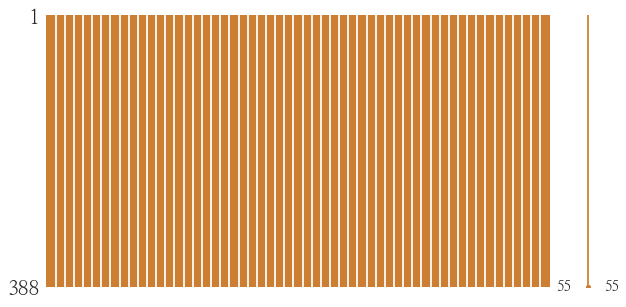

In [6]:
import missingno as msno
msno.matrix(df=data.iloc[:, :], figsize=(10, 5), color=(0.8, 0.5, 0.2))

### 분석에 사용하지 않는 데이터 삭제
다음의 항목들은 분석에서 제외한다.
  - 위도
  - 경도
  - 우편번호
  - 후기

In [7]:
original_length = len(data.columns)
data.drop(columns=['위도', '경도', '우편번호', '후기'], inplace=True)
print('Columns: {} -> {}'.format(original_length, len(data.columns)))

Columns: 55 -> 51


## EDA (Exploratory Data Analysis)

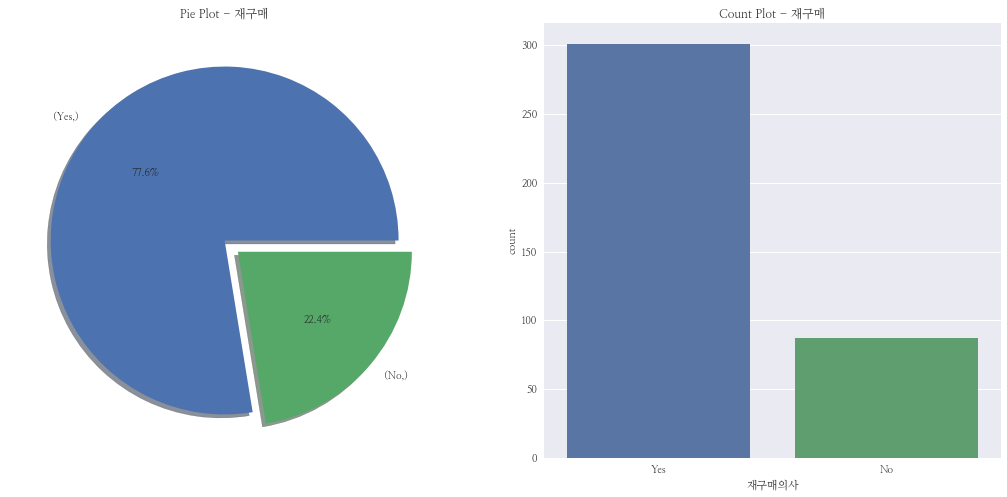

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['재구매의사']].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - 재구매')
ax[0].set_ylabel('')

sns.countplot('재구매의사', data=data, ax=ax[1])
ax[1].set_title('Count Plot - 재구매')

plt.show()

재구매의사가 있는 고객은 설문자 전체 중 약 77%를 차지한다.
특정한 특징을 지닌 설문자 중 재구매의사가 있는 고객이 77%를 넘는다면, 양의 상관관계를 가질 것이다.
그 반대라면, 음의 상관관계를 가질 것이다.

### 질적자료 분석
아래에 나열된 자료들은 질적자료이다
 - 성별
 - 결혼
 - 직업
 - 학력
 - 주문수단1
 - 주문수단2
 - 상품주문순서1
 - 상품주문순서2
 - 선호상품1
 - 선호상품2

In [9]:
pd.crosstab(data['결혼'], data['재구매의사'], margins=True).style.background_gradient(cmap='summer_r')

재구매의사,No,Yes,All
결혼,,,
Married,42,66,108
Prefer not to say,6,6,12
Single,39,229,268
All,87,301,388


미혼인 경우 기혼인 경우보다 재구매를 하는 경향이 있다.

Text(0.5, 1.0, '(4) 직업 vs 결혼')

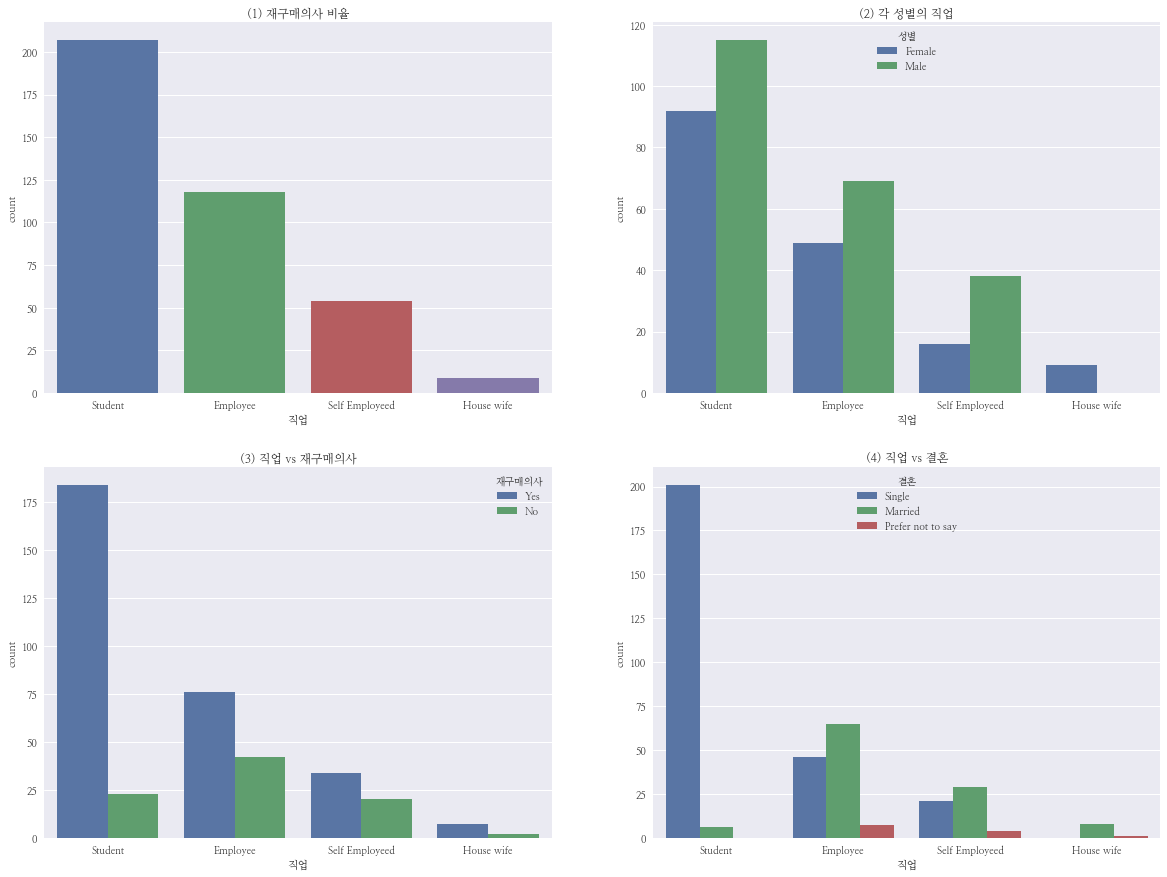

In [10]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('직업', data=data, ax=ax[0, 0])
sns.countplot('직업', hue='성별', data=data, ax=ax[0, 1])
sns.countplot('직업', hue='재구매의사', data=data, ax=ax[1, 0])
sns.countplot('직업', hue='결혼', data=data, ax=ax[1, 1])

ax[0, 0].set_title('(1) 재구매의사 비율')
ax[0, 1].set_title('(2) 각 성별의 직업')
ax[1, 0].set_title('(3) 직업 vs 재구매의사')
ax[1, 1].set_title('(4) 직업 vs 결혼')

특성간 비교를 통해 다음을 알 수 있다.
  - 직업별 성별의 비율은 서로 비슷하다.
  - 학생은 미혼인 경우가 다른 직업군에 비해 압도적으로 높다.
  - 학생을 제외한 다른 직업군은 결혼유무의 비율이 비슷하다.

학생과 미혼의 관계는 매우 깊음을 알 수 있다.

In [11]:
width = 0.3
pie_colors = plt.get_cmap('cool')(np.array([50, 100, 150, 200, 250, 300]))
def nested_pie(outer_data, inner_data, ax, title='', labels=[]):
    wedges_outer, _ = ax.pie(
        outer_data,
        radius=1,
        colors=pie_colors,
        wedgeprops=dict(width=width, edgecolor='w'), startangle=90)
    ax.pie(
        inner_data,
        radius=1-width,
        colors=pie_colors,
        wedgeprops=dict(width=width, edgecolor='w'), startangle=90)
    
    ax.set(aspect="equal", title=title)
    ax.legend(
        wedges_outer,
        labels,
        title=title,
        loc="lower center",
        bbox_to_anchor=(0.85, -0.1, 0.5, 1))

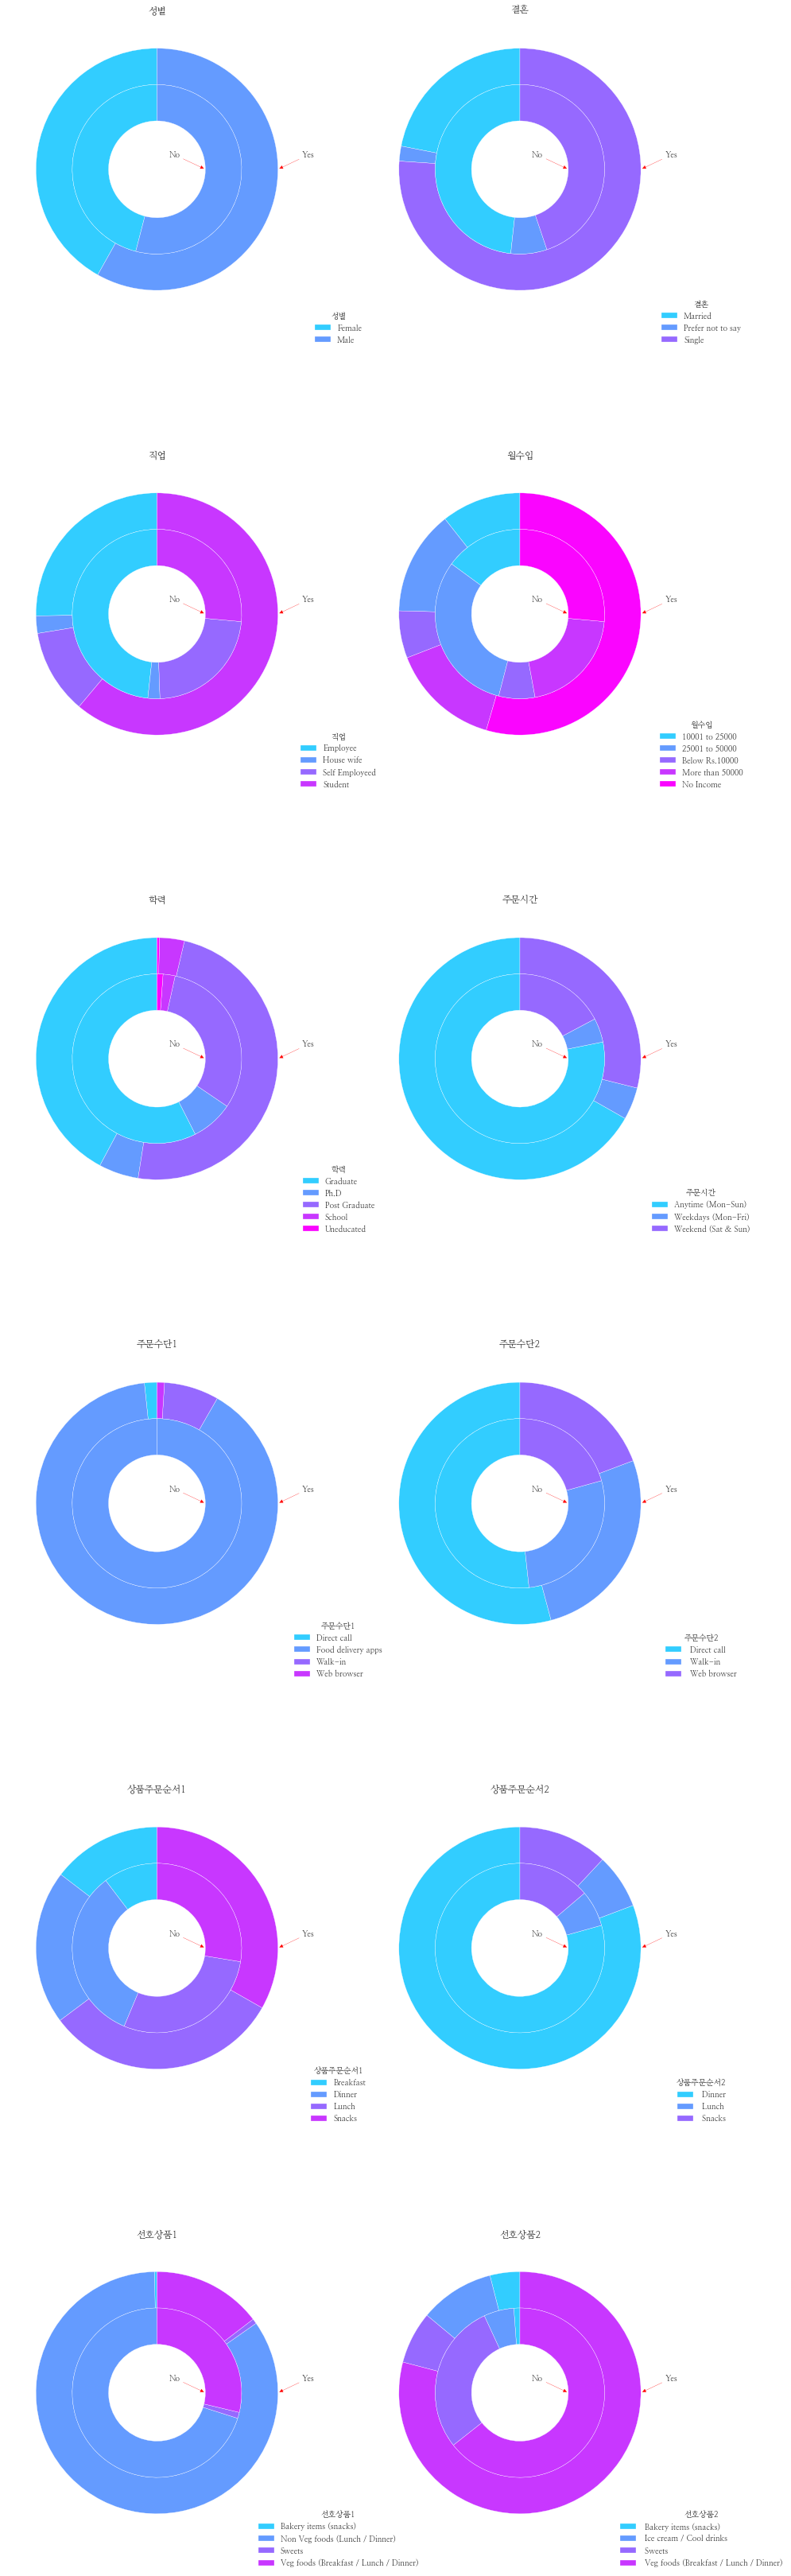

In [12]:
_, axes = plt.subplots(6, 2, figsize=(15, 60))
arrowprops = dict(color='red', arrowstyle="-|>")
columns = ['성별', '결혼', '직업', '월수입', '학력', '주문시간', '주문수단1', '주문수단2', '상품주문순서1', '상품주문순서2', '선호상품1', '선호상품2']
for i in range(0, 12):
    ax = axes[int(i / 2)][i % 2]
    pivotted = data.groupby([columns[i], '재구매의사']).size().reset_index() \
        .pivot(columns=columns[i], index='재구매의사', values=0).fillna(0)
    nested_pie(
        outer_data=pivotted.iloc[1],
        inner_data=pivotted.iloc[0],
        ax=ax,
        title=columns[i],
        labels=list(pivotted.columns)
    )
    ax.annotate(pivotted.index[1], xy=(1, 0), xytext=(1.2, 0.1), arrowprops=arrowprops)
    ax.annotate(pivotted.index[0], xy=(1-width*2, 0), xytext=(0.1, 0.1), arrowprops=arrowprops)
plt.show()

#### 필요없는 질적자료 제거
성별은 재구매의사에 큰 영향을 끼치지 않는다
학력 또한 재구매의사에 큰 영향을 끼치지 못 할 정도로 분포에 큰 차이가 없다.
주문시간 분포는 재구매의사가 있고없고에 큰 차이가 없다.
주문수단1 데이터는 재구매의사가 없는 경우 모두 어플을 이용한 주문인 경우다.
중복을 제거한 데이터의 총 양이 286개로 적고 편파적인 성향을 띄우기때문에 특징으로 사용하기에 무리가 있다.
주문수단2, 상품주문순서1, 상품주문순서2는 분포가 재구매의사가 있고없고 차이가 거의 없다.
따라서, 특징으로 사용하기에 부적합하다.

아래에 나열된 질적자료들은 특징으로 사용하지 않는다.
  - 성별
  - 학력
  - 주문시간
  - 주문수단1
  - 주문수단2
  - 상품주문순서1
  - 상품주문순서2

In [13]:
original_length = len(data.columns)
data.drop(columns=['성별', '학력', '주문시간', '주문수단1', '주문수단2', '상품주문순서1', '상품주문순서2'], inplace=True)
print('Columns: {} -> {}'.format(original_length, len(data.columns)))

Columns: 51 -> 44


## 상관분석
상관분석을 통해 목표값과 특성들의 관계를 알고자 한다.

### 상관분석 사전작업
상관분석을 위한 상관행렬 그래프를 만들기에 앞서 작업이 필요하다.
  - 퍼지화하여 문장으로된 데이터를 수치화
  - 질적자료를 제외한 양적자료만으로 구성해 그래프 생성

In [14]:
data_fuzzied = data.copy()
data_fuzzied = data_fuzzied.replace(['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree', 'Strongly agree'], [0, 1, 2, 3, 4, 4])
data_fuzzied = data_fuzzied.replace(['Unimportant', 'Slightly Important', 'Moderately Important', 'Important', 'Very Important'], [0, 1, 2, 3, 4])
data_fuzzied = data_fuzzied.replace({'Yes': 1, 'Maybe': 0.5, 'No': 0})
for value in data_fuzzied[['주문대기가능시간']].drop_duplicates().values.flatten():
    data_fuzzied.replace({'주문대기가능시간': {value: int(re.findall("\d+", value)[0])}}, inplace=True)

quantitave_data = data_fuzzied.drop(columns=['결혼', '직업', '월수입', '선호상품1', '선호상품2'])

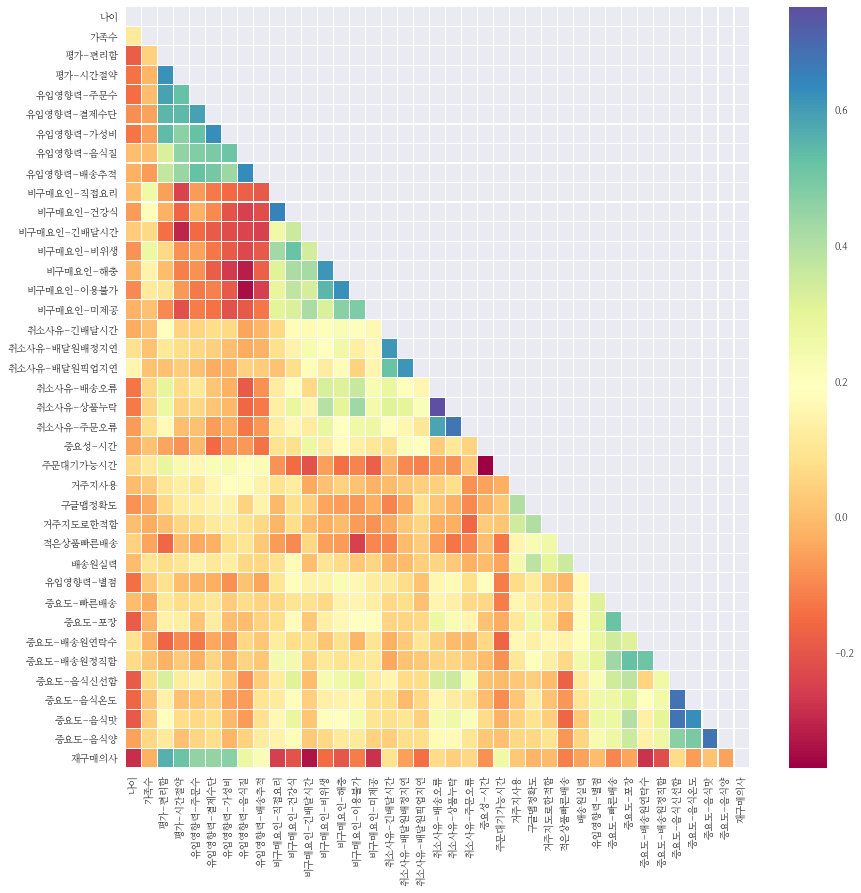

In [15]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    data=quantitave_data.corr(method='spearman'),
    mask=np.triu(quantitave_data.corr(method='spearman')),
    annot=False, cmap='Spectral', linewidths=0.1, linecolor='white')
plt.show()

### 상관분석 결과
#### 음의 상관관계
재구매의사가 아래에 나열되는 데이터들에 대해 강한 음의 상관관계를 가진다.
  - 나이
  - 비구매요인들 (직접요리, 건강식, 긴배달시간, 비위생, 해충, 이용불가, 미제공)
  - 중요도-배송원연락수
  - 중요도-배송원정직함

#### 양의 상관관계
그리고, 아래에 나열되는 데이터들과는 강한 양의 상관관계를 가진다.
  - 평가-편리함
  - 평가-시간절약
  - 유입영향력-주문수
  - 유입영향력-결제수단
  - 유입영향력-가성비

흥미롭게도 음의 상관관계를 가지는 요소들은 양의 상관관계를 가지는 요소들에 대해 음의 상관관계를 가진다.

#### 약한 상관관계
다음의 특성들은 비교적 약한 양/음의 상관관계를 가진다.
  - 유입영향력-음식질
  - 유입영향력-배송추적
  - 취소사유-긴배달시간
  - 취소사유-배달원픽업지연
  - 중요성-시간
  - 주문대기가능시간
  - 적은상품빠른배송
  - 중요도-빠른배송
  - 중요도-음식신선함

이외에 다른 특성들은 매우 낮은 상관관계를 가져 특징으로 사용하기 어려워보인다.

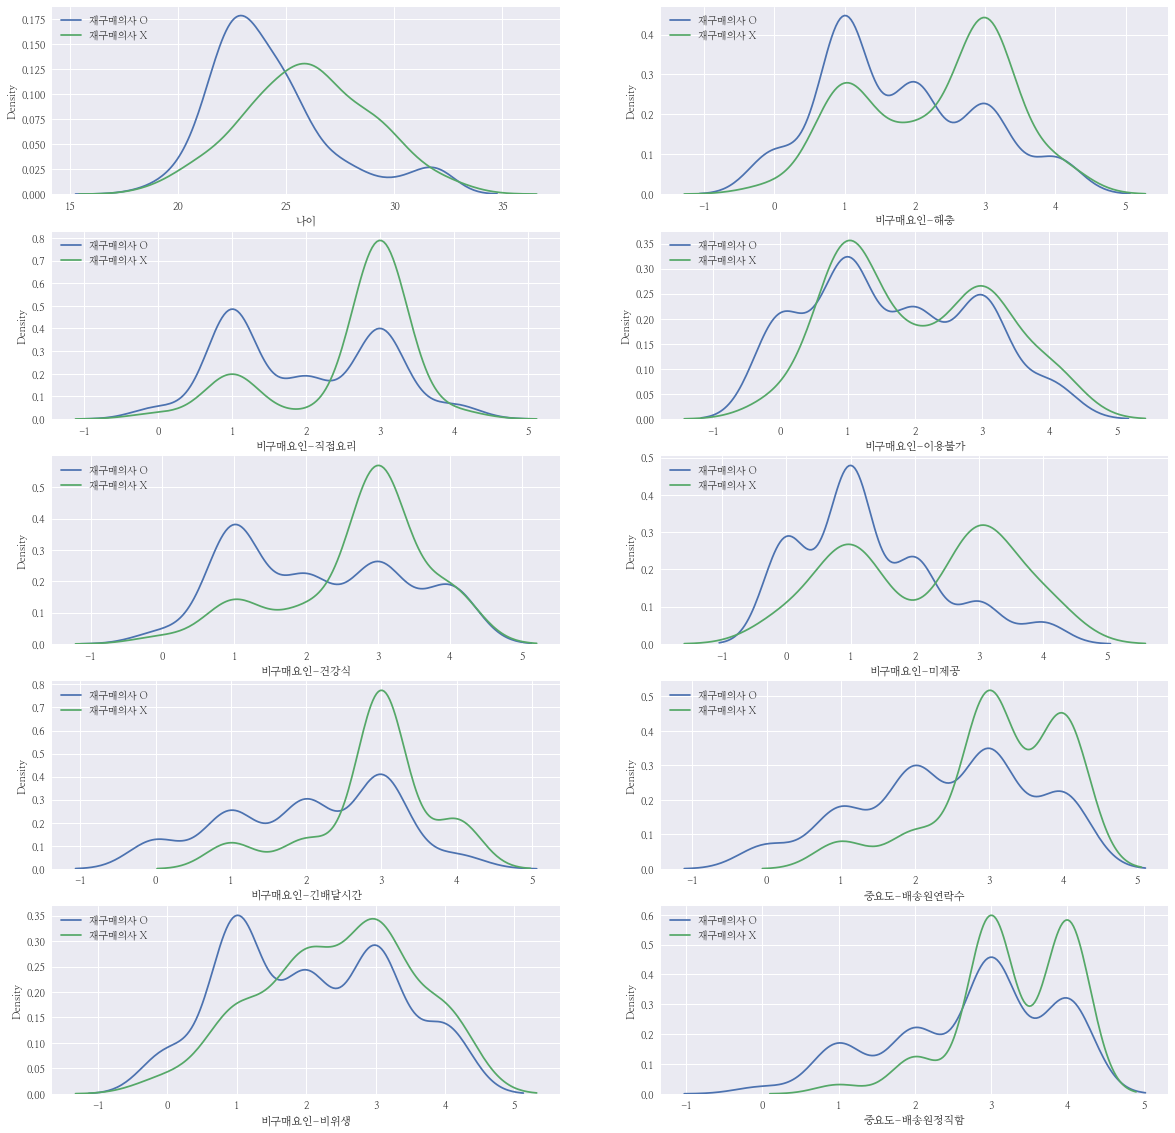

In [16]:
columns = [
    '나이',
    '비구매요인-직접요리',
    '비구매요인-건강식',
    '비구매요인-긴배달시간',
    '비구매요인-비위생',
    '비구매요인-해충',
    '비구매요인-이용불가',
    '비구매요인-미제공',
    '중요도-배송원연락수',
    '중요도-배송원정직함']
_, axes = plt.subplots(5, 2, figsize=(20, 20))
for i in range(len(columns)):
    ax = axes[int(i % 5)][int(i / 5)]
    sns.kdeplot(data_fuzzied[data['재구매의사'] == 'Yes'][columns[i]], ax=ax, label='재구매의사 O', legend=True)
    sns.kdeplot(data_fuzzied[data['재구매의사'] == 'No'][columns[i]], ax=ax, label='재구매의사 X', legend=True)
    ax.legend(['재구매의사 O', '재구매의사 X'], loc='upper left')

#### 음의 상관관계 특성들
특징으로 쓰기에 충분할만큼 재구매의사 여부 확률밀도가 다르다.

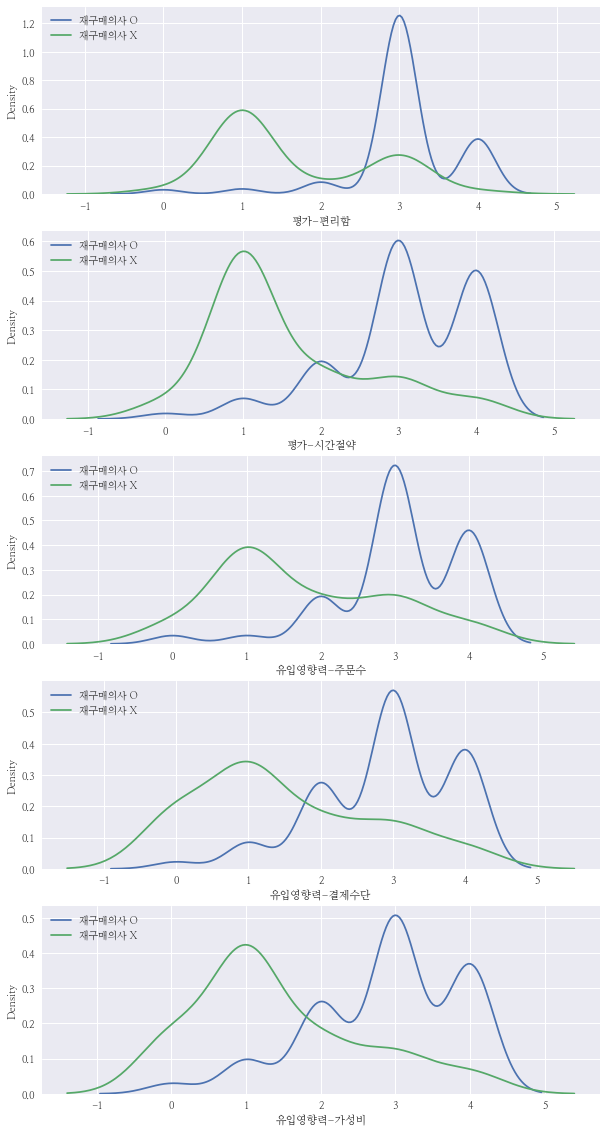

In [17]:
columns = [
    '평가-편리함',
    '평가-시간절약',
    '유입영향력-주문수',
    '유입영향력-결제수단',
    '유입영향력-가성비']
_, axes = plt.subplots(5, 1, figsize=(10, 20))
for i in range(len(columns)):
    ax = axes[i]
    sns.kdeplot(data_fuzzied[data['재구매의사'] == 'Yes'][columns[i]], ax=ax, label='재구매의사 O', legend=True)
    sns.kdeplot(data_fuzzied[data['재구매의사'] == 'No'][columns[i]], ax=ax, label='재구매의사 X', legend=True)
    ax.legend(['재구매의사 O', '재구매의사 X'], loc='upper left')

#### 양의 상관관계 특성들
특징으로 쓰기에 충분할만큼 재구매의사 여부 확률밀도가 다르다.

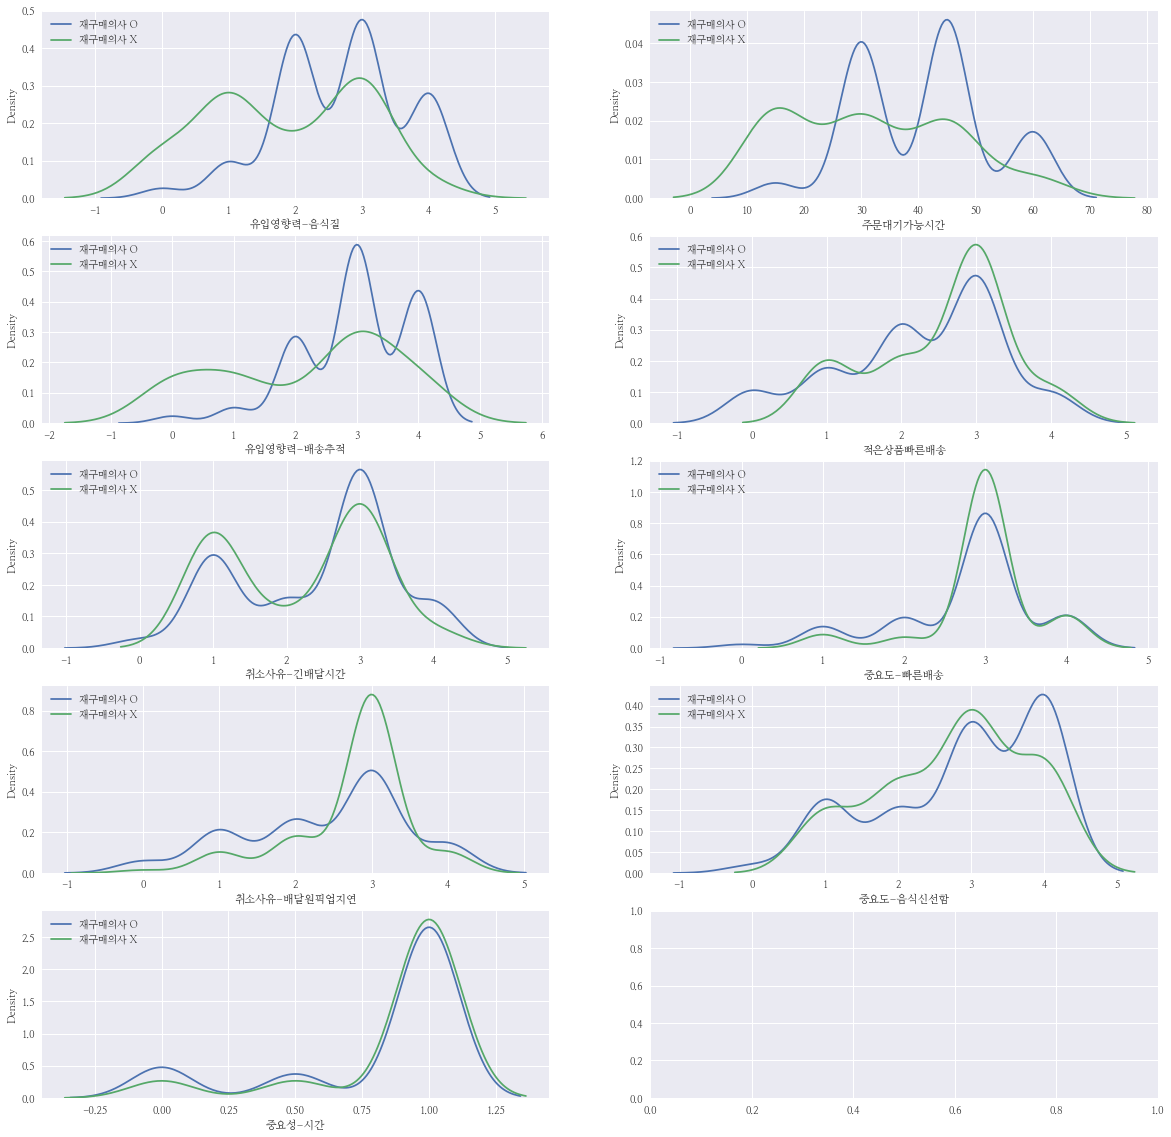

In [18]:
columns = [
    '유입영향력-음식질',
    '유입영향력-배송추적',
    '취소사유-긴배달시간',
    '취소사유-배달원픽업지연',
    '중요성-시간',
    '주문대기가능시간',
    '적은상품빠른배송',
    '중요도-빠른배송',
    '중요도-음식신선함']
_, axes = plt.subplots(5, 2, figsize=(20, 20))
for i in range(len(columns)):
    ax = axes[int(i % 5)][int(i / 5)]
    sns.kdeplot(data_fuzzied[data['재구매의사'] == 'Yes'][columns[i]], ax=ax, label='재구매의사 O', legend=True)
    sns.kdeplot(data_fuzzied[data['재구매의사'] == 'No'][columns[i]], ax=ax, label='재구매의사 X', legend=True)
    ax.legend(['재구매의사 O', '재구매의사 X'], loc='upper left')

#### 약한 상관관계 특성들
상관관계가 약하다고 판단했지만, 특징으로 사용이 가능한 특성들이 몇 보인다.
  - 유입영향력-음식질
  - 유입영향력-배송추적
  - 주문대기가능시간
  - 중요도-음식신선함

## 양적자료 분석
다음의 특성들이 양적자료이다.
  - 나이
  - 가족수

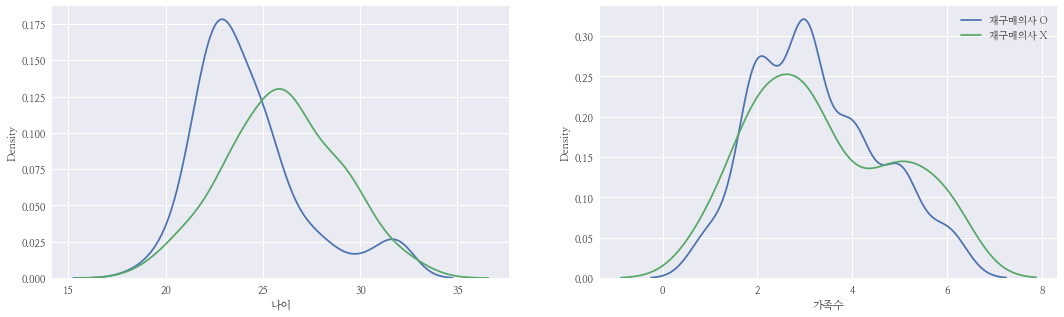

In [19]:
ig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data[data['재구매의사'] == 'Yes']['나이'], ax=ax[0])
sns.kdeplot(data[data['재구매의사'] == 'No']['나이'], ax=ax[0])
plt.legend(['재구매의사 O', '재구매의사 X'])

sns.kdeplot(data[data['재구매의사'] == 'Yes']['가족수'], ax=ax[1])
sns.kdeplot(data[data['재구매의사'] == 'No']['가족수'], ax=ax[1])
plt.legend(['재구매의사 O', '재구매의사 X'])
plt.show()

  - 나이가 어릴수록 재구매를 원하는 경향이 있다.
  - 가족수는 스펙트럼이 비슷한 것으로 보아 재구매의사와 큰 관련이 없어보인다.

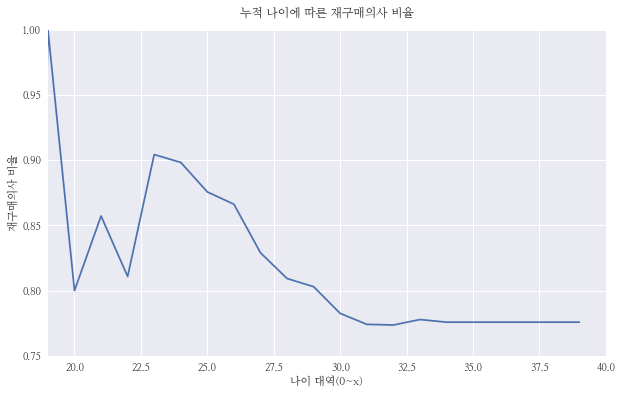

In [20]:
cummulate_repurchase_ratio = []
for i in range(0, 40):
    length = len(data[data['나이'] < i])
    cummulate_repurchase_ratio.append(
        (len(data[data['나이'] < i][data['재구매의사'] == 'Yes']) / length) if length > 0 else 0
        )

plt.figure(figsize=(10, 6))
plt.plot(cummulate_repurchase_ratio)
plt.title('누적 나이에 따른 재구매의사 비율', y=1.02)
plt.xlim(19, 40)
plt.ylim(0.75, 1)
plt.ylabel('재구매의사 비율')
plt.xlabel('나이 대역(0~x)')
plt.show()

나이 누적분포로 보아도 23세 전후로 재구매 의사 비율이 높은 것을 볼 수 있다.

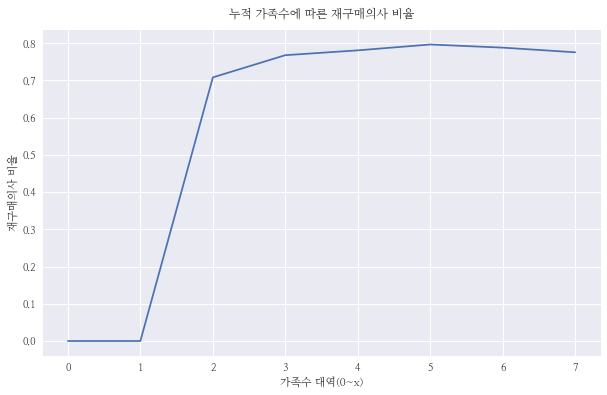

In [21]:
cummulate_repurchase_ratio = []
for i in range(0, 8):
    length = len(data[data['가족수'] < i])
    cummulate_repurchase_ratio.append(
        (len(data[data['가족수'] < i][data['재구매의사'] == 'Yes']) / length) if length > 0 else 0
        )

plt.figure(figsize=(10, 6))
plt.plot(cummulate_repurchase_ratio)
plt.title('누적 가족수에 따른 재구매의사 비율', y=1.02)
plt.ylabel('재구매의사 비율')
plt.xlabel('가족수 대역(0~x)')
plt.show()

가족수 누적분포로 보았을 때, 가족수 2~7명 대역에서 재구매의사비율의 변동이 적은 것을 볼 수 있다.

## 양적/질적 자료 동시분석

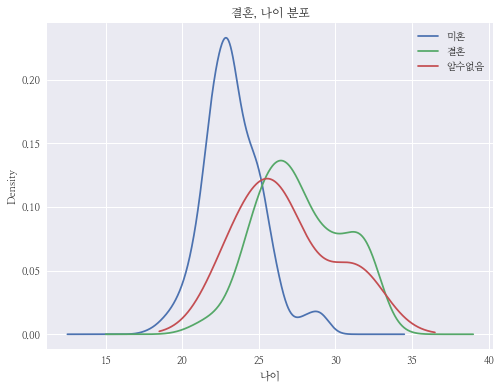

In [22]:
plt.figure(figsize=(8, 6))
data['나이'][data['결혼'] == 'Single'].plot(kind='kde')
data['나이'][data['결혼'] == 'Married'].plot(kind='kde')
data['나이'][data['결혼'] == 'Prefer not to say'].plot(kind='kde')

plt.xlabel('나이')
plt.title('결혼, 나이 분포')
plt.legend(['미혼', '결혼', '알수없음'])

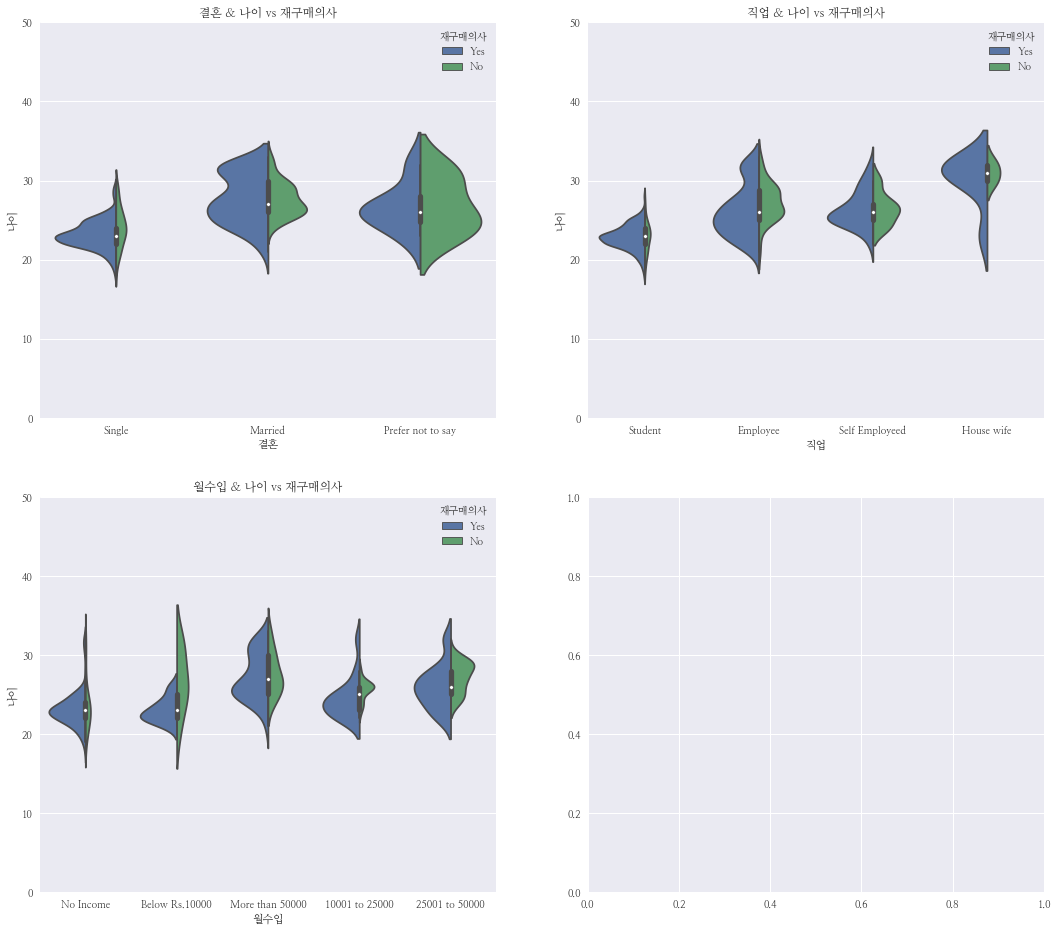

In [23]:
f, ax = plt.subplots(2, 2, figsize=(18, 16))
sns.violinplot('결혼', '나이', hue='재구매의사', data=data, scale='count', split=True, ax=ax[0][0])
ax[0][0].set_title('결혼 & 나이 vs 재구매의사')
ax[0][0].set_yticks(range(0, 60, 10))

sns.violinplot('직업', '나이', hue='재구매의사', data=data, scale='count', split=True, ax=ax[0][1])
ax[0][1].set_title('직업 & 나이 vs 재구매의사')
ax[0][1].set_yticks(range(0, 60, 10))

sns.violinplot('월수입', '나이', hue='재구매의사', data=data, scale='count', split=True, ax=ax[1][0])
ax[1][0].set_title('월수입 & 나이 vs 재구매의사')
ax[1][0].set_yticks(range(0, 60, 10))

plt.show()

아래의 데이터들 모두 나이와 결합했을 때 다양한 스펙트럼을 보여준다.
특징으로서 충분한 역할을 할 수 있다.
  - 결혼
  - 직업
  - 월수입

## 예측

### 라이브러리 불러오기
  - sklearn

In [24]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

### 데이터 전처리 후 라벨과 분리

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_encoded = data_fuzzied.copy()[[
    '결혼',
    '직업',
    '월수입',
    '선호상품1',
    '선호상품2',
    '나이',
    '비구매요인-직접요리',
    '비구매요인-건강식',
    '비구매요인-긴배달시간',
    '비구매요인-비위생',
    '비구매요인-해충',
    '비구매요인-이용불가',
    '비구매요인-미제공',
    '중요도-배송원연락수',
    '중요도-배송원정직함',
    '평가-편리함',
    '평가-시간절약',
    '유입영향력-주문수',
    '유입영향력-결제수단',
    '유입영향력-가성비',
    '유입영향력-음식질',
    '유입영향력-배송추적',
    '주문대기가능시간',
    '중요도-음식신선함',
    '재구매의사'
]]
data_encoded[['결혼']] = encoder.fit_transform(data[['결혼']])
data_encoded[['직업']] = encoder.fit_transform(data[['직업']])
data_encoded[['월수입']] = encoder.fit_transform(data[['월수입']])
data_encoded[['선호상품1']] = encoder.fit_transform(data[['선호상품1']])
data_encoded[['선호상품2']] = encoder.fit_transform(data[['선호상품2']])

X = data_encoded.drop(['재구매의사'], axis=1)
y = data_encoded['재구매의사']

#### Logistic Regression

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.92      0.99      0.96        86

    accuracy                           0.93       117
   macro avg       0.94      0.88      0.91       117
weighted avg       0.93      0.93      0.93       117

[[24  7]
 [ 1 85]]


#### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.98      0.99      0.98        86

    accuracy                           0.97       117
   macro avg       0.97      0.96      0.97       117
weighted avg       0.97      0.97      0.97       117

[[29  2]
 [ 1 85]]


#### Decision Tree Classifier

In [28]:
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    print('---------- Depth {} ----------'.format(depth))
    print('Train Sets Score: {:.3f}'.format(tree.score(X_train, y_train)))
    print('Test Sets Score: {:.3f}'.format(tree.score(X_test, y_test)))

---------- Depth 1 ----------
Train Sets Score: 0.886
Test Sets Score: 0.897
---------- Depth 2 ----------
Train Sets Score: 0.900
Test Sets Score: 0.897
---------- Depth 3 ----------
Train Sets Score: 0.919
Test Sets Score: 0.932
---------- Depth 4 ----------
Train Sets Score: 0.930
Test Sets Score: 0.940
---------- Depth 5 ----------
Train Sets Score: 0.948
Test Sets Score: 0.897
---------- Depth 6 ----------
Train Sets Score: 0.978
Test Sets Score: 0.932
---------- Depth 7 ----------
Train Sets Score: 0.985
Test Sets Score: 0.915
---------- Depth 8 ----------
Train Sets Score: 0.996
Test Sets Score: 0.957
---------- Depth 9 ----------
Train Sets Score: 1.000
Test Sets Score: 0.940
---------- Depth 10 ----------
Train Sets Score: 1.000
Test Sets Score: 0.940


#### KNN Classifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.89      0.99      0.94        86

    accuracy                           0.91       117
   macro avg       0.92      0.83      0.87       117
weighted avg       0.91      0.91      0.90       117

[[21 10]
 [ 1 85]]


## 모델 성능평가
주제에 대해
Random Forest Classifier,
Decision Tree Classifier,
Logistic Regression,
KNN Classifier
순서로 성능이 좋다.